# Simulator Data

As reported in:
- SH_simulator_outputs
- simulator_outputs

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
# Initialization
import numpy as np
import pandas as pd
from datetime import timedelta, datetime
from os import listdir
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

__Choosing the participant group we are going to look at: completed all__

In [4]:
# setting the path to the qualitative data master list
Qualitative_Path = ("N:\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Qualitative\\")

# reading the demographic data into a dataframe--- index = participant ID, colums = feature label
Demographics = pd.read_excel(Qualitative_Path + "Demographics.xlsx", sheet_name = "Master Data")
Demographics = Demographics.set_index('Participant ID')

In [5]:
# grouping participants based on their study completion status
status = Demographics.groupby('Participant Status')
completed_IDs = np.array(status.groups['All Completed'])[3:]

Analyzed_IDs = completed_IDs
Analyzed_IDs

array([13., 19., 22., 23., 25., 26., 27., 28., 33., 34.])

In [6]:
## Setting the path to Quantitative Data
Quantitative_path = "N:\\Shabnam Haghzare\\01- AV_OA_Study\\Master_Data_List\\Quantitative"

# A. Reading the Data

In [7]:
###Making a DataFrame for each of the features:
from math import pi

SteerDead = 10*pi/180;

def find_steering_reversal_num(ID, scenario, csv):
    SteerRev_Num = 0 #Initialize number of reversals
    SteerDir = 0 #Initially assume no steering input
    #loop through steering speed
    SteeringSpeed = csv.loc[:,["Steering wheel speed"]]
    
    for I,row in SteeringSpeed.iterrows():
        #Positive steering input
        if SteeringSpeed.loc[I][0] > SteerDead: 
            #Was negative steering input
            if SteerDir == -1:
                SteerRev_Num = SteerRev_Num + 1;
            SteerDir = 1
        #Negative steering input
        else:
            if SteeringSpeed.loc[I][0] < -SteerDead : 
                #Was positive steering input
                if (SteerDir == 1):
                    SteerRev_Num = SteerRev_Num + 1;
            SteerDir = -1;
    
    return SteerRev_Num

# Initializatino of Features
speed_mean = pd.DataFrame(dtype = float)
speed_var   = pd.DataFrame(dtype = float)
min_speed = pd.DataFrame(dtype = float)
max_speed = pd.DataFrame(dtype = float)

steering_wheel_speed_mean = pd.DataFrame(dtype = float)
steering_wheel_speed_std = pd.DataFrame(dtype = float)
steering_wheel_RR = pd.DataFrame(dtype = float)

mean_brake_force = pd.DataFrame(dtype = float)
SD_brake_force = pd.DataFrame(dtype = float)

SDLP = pd.DataFrame(dtype = float) 

duration = pd.DataFrame(dtype = float)

mean_LongACC = pd.DataFrame(dtype = float)
SD_LongACC = pd.DataFrame(dtype = float)

mean_LatACC = pd.DataFrame(dtype = float)
SD_LatACC = pd.DataFrame(dtype = float)
max_LatACC = pd.DataFrame(dtype = float)


In [8]:
Analyzed_IDs = Analyzed_IDs[:-1]
Analyzed_IDs

array([13., 19., 22., 23., 25., 26., 27., 28., 33.])

#### Finding features from structured CSVs

In [9]:
for ID in Analyzed_IDs:
    ID = int(ID)
    for scenario in ["BM", "BA", "RM", "RA","TM", "TA"]:
        scenario_path_Structured = Quantitative_path + "\\" + str(ID) + "\\Structured\\Simulator\\" + scenario 
        simulator_output_csv = pd.read_csv(scenario_path_Structured + "\\" + scenario + "_simulator_outputs.csv")
        SH_simulator_output_csv = pd.read_csv(scenario_path_Structured + "\\" + scenario + "_SH_simulator_outputs.csv")
        
        ## Features
        speed_mean.loc[ID, scenario] = simulator_output_csv.loc[:,["Speed/X"]].mean()[0]*3.6 #m/s to km/hr
        speed_var.loc[ID, scenario] = simulator_output_csv.loc[:,["Speed/X"]].std()[0]*3.6#m/s to km/hr
        min_speed.loc[ID, scenario] = simulator_output_csv.loc[:,["Speed/X"]].min()[0]*3.6#m/s to km/hr
        max_speed.loc[ID, scenario] = simulator_output_csv.loc[:,["Speed/X"]].max()[0]*3.6#m/s to km/hr

        
        steering_wheel_speed_mean.loc[ID, scenario] = simulator_output_csv.loc[:,["Steering wheel speed"]].mean()[0]#rad/sec
        
        
        duration.loc[ID, scenario] = simulator_output_csv.loc[:,["Time"]].max()[0] - simulator_output_csv.loc[:,["Time"]].min()[0] #in seconds
        
        RR_number = find_steering_reversal_num(ID, scenario, simulator_output_csv)
        steering_wheel_RR.loc[ID, scenario] = RR_number/duration.loc[ID, scenario]*60 #num/min

        mean_brake_force.loc[ID, scenario] = simulator_output_csv.loc[:,["Brake pedal force"]].mean()[0]#N
        SD_brake_force.loc[ID, scenario] = simulator_output_csv.loc[:,["Brake pedal force"]].std()[0] #N

        SDLP.loc[ID, scenario] = simulator_output_csv.loc[:,["Road gap"]].std()[0] #in meter

        mean_LongACC.loc[ID, scenario] = simulator_output_csv.loc[:,["CoG Acceleration/X"]].mean()[0]
        SD_LongACC.loc[ID, scenario] = simulator_output_csv.loc[:,["CoG Acceleration/X"]].std()[0]

        mean_LatACC.loc[ID, scenario] = simulator_output_csv.loc[:,["CoG Acceleration/Y"]].mean()[0]
        SD_LatACC.loc[ID, scenario] = simulator_output_csv.loc[:,["CoG Acceleration/Y"]].std()[0]
        max_LatACC.loc[ID, scenario] = simulator_output_csv.loc[:,["CoG Acceleration/Y"]].abs().max()[0]


In [10]:
scenario_path_Structured = Quantitative_path + "\\" + str(33) + "\\Structured\\Simulator\\" + "TA"
simulator_output_csv = pd.read_csv(scenario_path_Structured + "\\" + "TA" + "_simulator_outputs.csv")
simulator_output_csv.loc[:,["Steering wheel speed"]].mean()

Steering wheel speed   -0.000579
dtype: float64

In [11]:
simulator_output_csv.loc[:,["CoG Acceleration/Y"]].abs().max()[0]


5.651680000000002

In [12]:
duration

,BM,BA,RM,RA,TM,TA
13,394.2900,476.1448,404.3544,426.4410,484.1977,550.1980
19,590.8880,462.7420,511.7860,477.7056,479.4934,530.1382
22,520.9950,435.4460,512.3500,475.3019,555.0446,505.8416
23,420.0860,457.9383,467.9630,430.2008,523.2560,467.2509
25,456.8410,472.0009,594.9870,421.2462,692.2370,507.1930
26,400.6910,412.0045,420.6393,481.4900,450.1020,600.6682
27,418.9340,478.1910,413.5464,454.0360,457.5920,499.8009
28,417.1900,407.8442,399.5440,469.7937,538.3448,575.2409
33,482.1875,418.9340,442.0400,472.8360,464.2935,542.9860


### Mean of features for all participants

In [13]:
features = ["Speed Mean", "Speed Variability", "Min Speed","Max Speed",
            "Steering Angle Mean", "Steering Angle SD", "Steering Wheel Reversal Rate", 
            "Brake Force Mean", "Brake Force SD", "SD of Lane Position", 
            "Long ACC Mean", "Long ACC SD", "Lateral ACC Mean","Lateral ACC SD","Lateral ACC Max", "duration"]

scenarios = ["BM", "BA", "TM", "TA", "RM", "RA"]

# Initiazation
mean_total_df = pd.DataFrame()
per_participant_total = pd.DataFrame()

#features
mean_total_df["Speed Mean"] = speed_mean.mean()
speed_mean["measure"] = "Speed Mean"

mean_total_df["Speed Variability"] = speed_var.mean()
speed_var["measure"] = "Speed Variability"

mean_total_df["Min Speed"] = min_speed.mean()
min_speed["measure"] = "Min Speed"

mean_total_df["Max Speed"] = max_speed.mean()
max_speed["measure"] = "Max Speed"

mean_total_df["Steering Angle Mean"] = steering_wheel_speed_mean.mean()
steering_wheel_speed_mean["measure"] = "Steering Angle Mean"

mean_total_df["Steering Angle SD"] = steering_wheel_speed_std.mean()
steering_wheel_speed_std["measure"] = "Steering Angle SD"

mean_total_df["Steering Wheel Reversal Rate"] = steering_wheel_RR.mean()
steering_wheel_RR["measure"] = "Steering Wheel Reversal Rate"

mean_total_df["Brake Force Mean"] = mean_brake_force.mean()
mean_brake_force["measure"] = "Brake Force Mean"

mean_total_df["Brake Force SD"] = SD_brake_force.mean()
SD_brake_force["measure"] = "Brake Force SD"

mean_total_df["SD of Lane Position"] = SDLP.mean()
SDLP["measure"] = "SD of Lane Position"

mean_total_df["duration"] = duration.mean()
duration["measure"] = "duration"

mean_total_df["Long ACC Mean"] = mean_LongACC.mean()
mean_LongACC["measure"] = "Long ACC Mean"

mean_total_df["Long ACC SD"] = SD_LongACC.mean()
SD_LongACC["measure"] = "Long ACC SD"

mean_total_df["Lateral ACC Mean"] = mean_LatACC.mean()
mean_LatACC["measure"] = "Lateral ACC Mean"

mean_total_df["Lateral ACC SD"] = SD_LatACC.mean()
SD_LatACC["measure"] = "Lateral ACC SD"

mean_total_df["Lateral ACC Max"] = max_LatACC.mean()
max_LatACC["measure"] = "Lateral ACC Max"


## making the LoA column
for scenario in ["BM","TM","RM"]:
    mean_total_df.loc[scenario, "LoA"] = "Manual"
for scenario in ["BA","TA","RA"]:
    mean_total_df.loc[scenario, "LoA"] = "Auto"
        
## Making the driving condition column       
for scenario in ["TA","TM"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Traffic"
for scenario in ["RA","RM"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Rain"
for scenario in ["BM","BA"]:
    mean_total_df.loc[scenario, "Driving Condition"] = "Clear & No Traffic"

In [14]:
mean_total_df

,Speed Mean,Speed Variability,Min Speed,Max Speed,Steering Angle Mean,Steering Angle SD,Steering Wheel Reversal Rate,Brake Force Mean,Brake Force SD,SD of Lane Position,duration,Long ACC Mean,Long ACC SD,Lateral ACC Mean,Lateral ACC SD,Lateral ACC Max,LoA,Driving Condition
BM,50.727089,18.027687,0.229246,76.89944,-0.000991,NaN,13.996313,3.205372,14.577296,2.600309,455.789167,0.004601,0.772750,-0.215366,0.672981,3.755608,Manual,Clear & No Traffic
BA,50.650529,20.870029,-0.068974,70.16024,0.000262,NaN,5.075356,25.616517,76.635224,3.035121,446.805078,0.030632,0.887311,-0.245037,0.764777,3.661248,Auto,Clear & No Traffic
RM,49.261968,17.053417,0.115040,75.89368,-0.000192,NaN,15.631525,4.479404,16.746682,2.595723,463.023344,0.005623,0.841915,-0.209394,0.701000,7.917083,Manual,Rain
RA,49.963961,21.986869,-0.086283,70.13108,-0.002062,NaN,4.724102,34.351894,97.970765,2.961399,456.561244,0.003429,0.944310,-0.243385,0.793134,5.608634,Auto,Rain
TM,44.935310,19.022708,0.146819,76.11928,-0.000574,NaN,13.739315,6.495587,20.117284,2.742548,516.062333,0.002375,0.907952,-0.193130,0.647034,3.784908,Manual,Traffic
TA,42.330444,24.808850,-0.074052,70.10496,-0.000589,NaN,6.379295,48.596717,118.328667,3.069284,531.035300,0.009783,0.943167,-0.204128,0.720731,5.401114,Auto,Traffic


In [15]:
##Concating the per participants:

per_participant_total = pd.concat([speed_mean, speed_var, min_speed, max_speed, steering_wheel_speed_mean,
                                  steering_wheel_speed_std, steering_wheel_RR, mean_brake_force,
                                  SD_brake_force, SDLP,duration, mean_LongACC, SD_LongACC,
                                  mean_LatACC, SD_LatACC,max_LatACC],0)

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [16]:
per_participant_total.head()

,BA,BM,RA,RM,TA,TM,measure
13,47.357176,57.737137,53.354563,55.500524,40.638809,46.586626,Speed Mean
19,48.725176,38.488772,47.629316,43.860320,42.180061,47.037433,Speed Mean
22,51.778361,43.658739,47.870862,43.800332,44.202854,45.173023,Speed Mean
23,49.236131,54.130090,52.887970,47.925920,47.855343,43.086861,Speed Mean
25,47.770315,49.810322,54.012353,37.724751,44.085030,32.593211,Speed Mean


In [17]:
per_participant_LoA = per_participant_total.copy()
per_participant_condition = per_participant_total.copy()

per_participant_LoA['Auto'] = per_participant_total[["BA", "RA", "TA"]].mean(axis = 1)
per_participant_LoA['Manual'] = per_participant_total[["BM", "RM", "TM"]].mean(axis = 1)
per_participant_LoA.drop(columns = ["BA", "RA", "TA","BM", "RM", "TM"], inplace = True)

auto = per_participant_LoA.drop(columns = "Manual")
auto.rename(columns = {"Auto":"Value"}, inplace=True)
auto["LoA"] = "Auto"

manual = per_participant_LoA.drop(columns = "Auto")
manual.rename(columns = {"Manual":"Value"}, inplace=True)
manual["LoA"] = "Manual"

per_participant_LoA = pd.concat([auto,manual],0)

In [18]:
manual.groupby("measure").mean()

,Value
measure,
Brake Force Mean,4.726787
Brake Force SD,17.147087
Lateral ACC Max,5.152533
Lateral ACC Mean,-0.205963
Lateral ACC SD,0.673671
Long ACC Mean,0.004200
Long ACC SD,0.840872
Max Speed,76.304133
Min Speed,0.163702


In [19]:
auto.groupby("measure").std()

,Value
measure,
Brake Force Mean,6.765113
Brake Force SD,11.338716
Lateral ACC Max,0.327656
Lateral ACC Mean,0.006563
Lateral ACC SD,0.012263
Long ACC Mean,0.000784
Long ACC SD,0.024544
Max Speed,0.044323
Min Speed,0.024427


In [20]:
per_participant_LoA.head()

,measure,Value,LoA
13,Speed Mean,47.116849,Auto
19,Speed Mean,46.178184,Auto
22,Speed Mean,47.950692,Auto
23,Speed Mean,49.993148,Auto
25,Speed Mean,48.622566,Auto


Text(0, 0.5, 'Speed Variability')

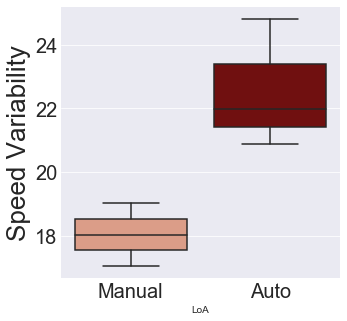

In [25]:
figure, axes = plt.subplots(1,1, figsize = (5,5), sharex= True)
my_pal = {"Manual": "darksalmon", "Auto": "maroon"}


g = sns.boxplot(x = "LoA", y = "Speed Variability", data =mean_total_df, palette= my_pal)
g.tick_params(labelsize=20)
g.set_ylabel("Speed Variability",fontsize=26)


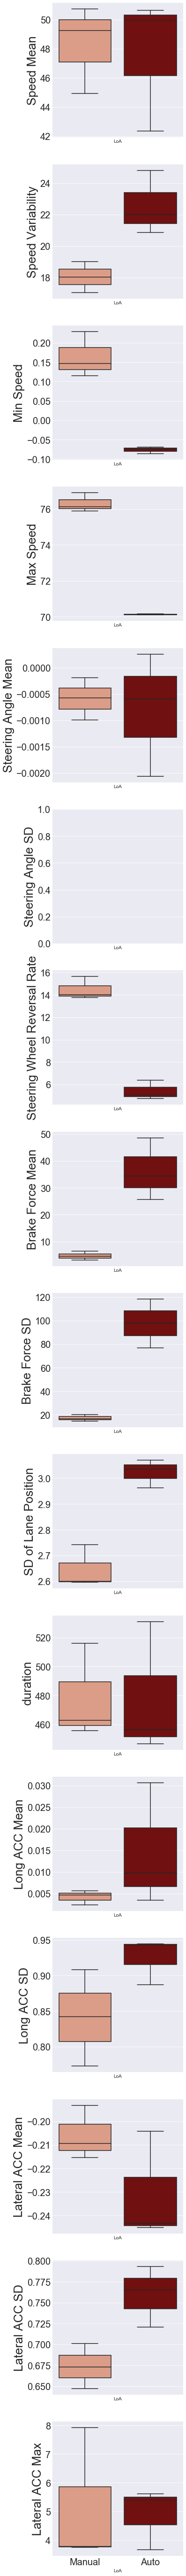

In [21]:
figure, axes = plt.subplots(len(mean_total_df.columns.tolist()[:-2]),1, figsize = (5,100), sharex= True)
my_pal = {"Manual": "darksalmon", "Auto": "maroon"}

i = 0
for driving_measure in mean_total_df.columns.tolist()[:-2]:
    g = sns.boxplot(x = "LoA", y = driving_measure, data =mean_total_df, palette= my_pal, ax = axes[i])
    g.tick_params(labelsize=20)
    g.set_ylabel(driving_measure,fontsize=26)
    i = i+1

In [22]:
# Importing Stats libraries
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.gofplots import ProbPlot

In [39]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']
    
    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])
    
    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])
    
    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

In [42]:
per_participant_LoA

,measure,Value,LoA
13,Speed Mean,47.116849,Auto
19,Speed Mean,46.178184,Auto
22,Speed Mean,47.950692,Auto
23,Speed Mean,49.993148,Auto
25,Speed Mean,48.622566,Auto
26,Speed Mean,46.402819,Auto
27,Speed Mean,47.333897,Auto
28,Speed Mean,47.529688,Auto
33,Speed Mean,47.706957,Auto
13,Speed Variability,23.127387,Auto


In [41]:
per_participant_LoA_copy = per_participant_LoA.copy()

per_participant_LoA_copy.rename(columns= {"Steering Wheel Reversal Rate": "RR","Speed Variability": "SpeedSD",
                                     'Max Speed':'MaxSpeed','Brake Force Mean':'BFM',
                          'Break Force SD': 'BFD', 'SD of Lane Position': 'SD of Lane Position'}, inplace=True)

measures_list = list(per_participant_LoA.groupby("measure").groups.keys());
for measure in measures_list:
    print("\n" + measure+ ":\n")
    data = per_participant_LoA.groupby("measure").get_group(measure)

    mod = ols('Value ~ LoA', data =data).fit()
    mod.summary()
    aov_table = sm.stats.anova_lm(mod, type = 1)
    print(anova_table(aov_table))


Brake Force Mean:

               sum_sq    df      mean_sq           F        PR(>F)    eta_sq  \
LoA       4454.242025   1.0  4454.242025  184.108022  3.403795e-10  0.920043   
Residual   387.098137  16.0    24.193634         NaN           NaN       NaN   

          omega_sq  
LoA       0.910496  
Residual       NaN  

Brake Force SD:

                sum_sq    df       mean_sq           F        PR(>F)  \
LoA       29159.529580   1.0  29159.529580  386.196606  1.254214e-12   
Residual   1208.069844  16.0     75.504365         NaN           NaN   

            eta_sq  omega_sq  
LoA       0.960218  0.955357  
Residual       NaN       NaN  

Lateral ACC Max:

              sum_sq    df   mean_sq         F    PR(>F)    eta_sq  omega_sq
LoA         0.309372   1.0  0.309372  0.039033  0.845871  0.002434 -0.056398
Residual  126.812835  16.0  7.925802       NaN       NaN       NaN       NaN

Lateral ACC Mean:

            sum_sq    df   mean_sq         F  PR(>F)    eta_sq  omega_sq
LoA  

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only v



SD of Lane Position:

            sum_sq    df   mean_sq          F        PR(>F)   eta_sq  omega_sq
LoA       0.635317   1.0  0.635317  59.280117  9.082235e-07  0.78746  0.764028
Residual  0.171475  16.0  0.010717        NaN           NaN      NaN       NaN

Speed Mean:

              sum_sq    df    mean_sq        F    PR(>F)    eta_sq  omega_sq
LoA         1.959078   1.0   1.959078  0.15772  0.696512  0.009761  -0.04909
Residual  198.739545  16.0  12.421222      NaN       NaN       NaN       NaN

Speed Variability:

             sum_sq    df    mean_sq          F    PR(>F)    eta_sq  omega_sq
LoA       91.963048   1.0  91.963048  31.864363  0.000037  0.665722  0.631633
Residual  46.177254  16.0   2.886078        NaN       NaN       NaN       NaN

Steering Angle Mean:

                sum_sq    df       mean_sq        F    PR(>F)    eta_sq  \
LoA       1.989744e-07   1.0  1.989744e-07  3.47958  0.080576  0.178627   
Residual  9.149354e-07  16.0  5.718346e-08      NaN       NaN     

C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))
C:\Users\haghzaS\AppData\Local\Continuum\anaconda3\envs\r-python-2\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only v

## Correlation of ACC scores and driving styles

In [48]:
# reading the acc questionnaire responces from the "Plug" file
plug_files_path = Qualitative_Path + "\\File Plugs to Quantitative Analysis"

acc_per_ID_scenario = pd.read_csv(plug_files_path + "\\acc_ID.csv")
acc_per_ID_scenario.set_index("Participant ID", inplace = True)

In [49]:
acc_driving_measures = acc_per_ID_scenario.groupby("Participant ID").mean()
acc_per_ID_scenario.groupby("Participant ID").mean()

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability
Participant ID,,,,,,,,,,,
13,5.444444,6.000000,5.500000,5.000000,5.111111,4.666667,5.000000,6.666667,5.222222,5.166667,5.401235
19,4.444444,6.000000,5.166667,4.333333,4.888889,3.666667,3.777778,4.500000,3.666667,4.555556,4.493827
22,4.666667,4.777778,4.833333,3.833333,3.888889,3.833333,3.111111,4.666667,3.333333,4.333333,4.104938
23,5.222222,5.555556,3.333333,3.500000,4.111111,5.666667,3.666667,2.833333,2.000000,3.833333,3.987654
25,5.222222,4.555556,4.500000,4.166667,5.111111,3.500000,4.666667,5.000000,4.444444,4.611111,4.574074
26,2.000000,5.444444,1.333333,2.000000,1.000000,5.166667,2.555556,1.166667,1.111111,1.833333,2.419753
27,6.222222,6.777778,6.666667,5.000000,6.111111,5.666667,6.222222,6.333333,6.222222,6.222222,6.135802
28,5.111111,6.888889,4.000000,6.500000,7.000000,6.833333,6.777778,7.000000,6.777778,6.777778,6.320988
33,6.777778,7.000000,3.000000,2.833333,5.111111,6.333333,3.555556,6.500000,6.777778,5.944444,5.320988


__We will only be looking at the driving measures that were significantly different across LoA__

In [50]:
driving_measures = ['Speed Variability','Max Speed',
 'Steering Wheel Reversal Rate', 'Brake Force Mean',
 'Brake Force SD', 'SD of Lane Position']

for measure in driving_measures:
    acc_driving_measures[measure] = abs(manual.groupby('measure').get_group(measure)[["Value"]]- auto.groupby('measure').get_group(measure)[["Value"]])
acc_driving_measures.dropna(inplace = True)

In [58]:
acc_driving_measures.drop(columns = "SD of Lane Position", inplace = True)

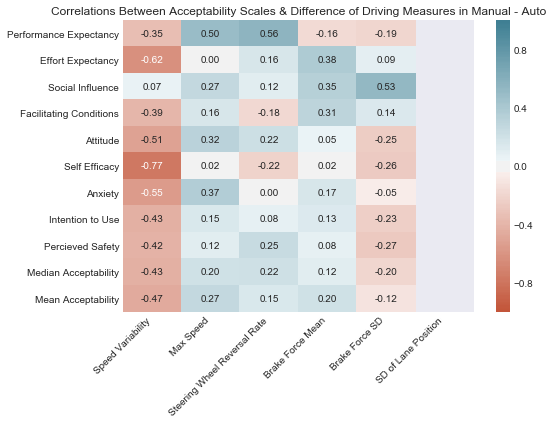

In [67]:
data = acc_driving_measures.copy()
data_corr = data.corr(method = "spearman").loc[list(acc_per_ID_scenario.groupby("Participant ID").mean().columns),driving_measures]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(data_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

#the degree to which they have deviated from auto
plt.title("Correlations Between Acceptability Scales & Difference of Driving Measures in Manual - Auto")
          # Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

__Now we will be looking at the driving performance in manual and acceptance__

In [53]:
acc_driving_measures_manual = acc_per_ID_scenario.groupby("Participant ID").mean()

driving_measures = ['Speed Variability','Max Speed',
 'Steering Wheel Reversal Rate', 'Brake Force Mean',
 'Brake Force SD', 'SD of Lane Position']

for measure in driving_measures:
    acc_driving_measures_manual[measure] = manual.groupby('measure').get_group(measure)[["Value"]]
acc_driving_measures_manual.dropna(inplace = True)
acc_driving_measures_manual

,Performance Expectancy,Effort Expectancy,Social Influence,Facilitating Conditions,Attitude,Self Efficacy,Anxiety,Intention to Use,Percieved Safety,Median Acceptability,Mean Acceptability,Speed Variability,Max Speed,Steering Wheel Reversal Rate,Brake Force Mean,Brake Force SD,SD of Lane Position
Participant ID,,,,,,,,,,,,,,,,,
13,5.444444,6.000000,5.500000,5.000000,5.111111,4.666667,5.000000,6.666667,5.222222,5.166667,5.401235,20.232933,80.62500,14.511652,5.568321,19.571345,2.532218
19,4.444444,6.000000,5.166667,4.333333,4.888889,3.666667,3.777778,4.500000,3.666667,4.555556,4.493827,17.438350,76.34532,15.969990,4.384076,15.490199,2.567786
22,4.666667,4.777778,4.833333,3.833333,3.888889,3.833333,3.111111,4.666667,3.333333,4.333333,4.104938,13.460135,67.29660,9.221931,1.899979,8.939824,2.662731
23,5.222222,5.555556,3.333333,3.500000,4.111111,5.666667,3.666667,2.833333,2.000000,3.833333,3.987654,18.791961,78.84672,11.060372,3.714349,15.834018,2.779890
25,5.222222,4.555556,4.500000,4.166667,5.111111,3.500000,4.666667,5.000000,4.444444,4.611111,4.574074,15.193739,60.21852,21.313254,5.337409,19.097004,2.496680
26,2.000000,5.444444,1.333333,2.000000,1.000000,5.166667,2.555556,1.166667,1.111111,1.833333,2.419753,18.799575,79.94664,10.606488,4.308768,15.029275,2.865497
27,6.222222,6.777778,6.666667,5.000000,6.111111,5.666667,6.222222,6.333333,6.222222,6.222222,6.135802,19.866566,88.31028,19.402171,7.878323,26.011227,2.738385
28,5.111111,6.888889,4.000000,6.500000,7.000000,6.833333,6.777778,7.000000,6.777778,6.777778,6.320988,20.075116,76.87560,6.506109,5.291863,19.911359,2.555282
33,6.777778,7.000000,3.000000,2.833333,5.111111,6.333333,3.555556,6.500000,6.777778,5.944444,5.320988,18.453063,78.27252,21.509495,4.157999,14.439535,2.617272


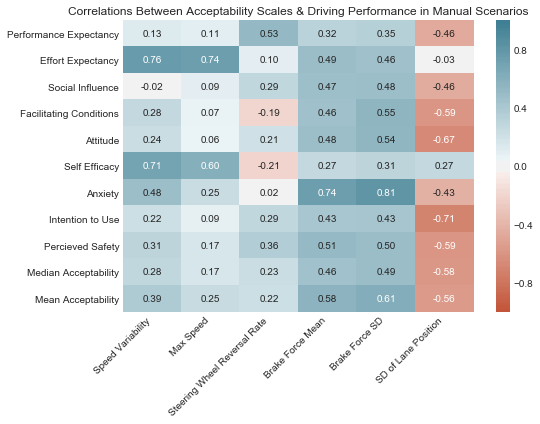

In [54]:
data = acc_driving_measures_manual.copy()
data_corr = data.corr().loc[list(acc_per_ID_scenario.groupby("Participant ID").mean().columns),driving_measures]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(data_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Acceptability Scales & Driving Performance in Manual Scenarios")
          # Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

In [63]:
data = acc_driving_measures_auto.copy()
data_corr = data.corr().loc[list(acc_per_ID_scenario.groupby("Participant ID").mean().columns),driving_measures]


fig, ax = plt.subplots(figsize=(8, 6))#figsize=(11, 9) 
sns.heatmap(data_corr,cmap=sns.diverging_palette(20, 220, n=200), annot=True, fmt='.2f',
           vmin=-1, vmax=1, center = 0)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.title("Correlations Between Acceptability Scales & Driving Performance in Auto Scenarios")
          # Add tight_layout to ensure the labels don't get cut off
plt.tight_layout()
plt.show()

NameError: name 'acc_driving_measures_auto' is not defined

In [60]:
# renaming the columns for each condition
acc_ID = pd.DataFrame()
for condition in ["Norm", "Rain", "Traffic"]:
    dict = {'Performance Expectancy': "Performance Expectancy in " +condition,
            'Effort Expectancy': "Effort Expectancy in " +condition,
             'Social Influence': "Social Influence in " +condition,
             'Facilitating Conditions': "Facilitating Conditions in " +condition,
             'Attitude': "Attitude in " +condition,
             'Self Efficay': "Self Efficay in " +condition,
             'Anxiety': "Anxiety in " +condition,
             'Intention to Use': "Intention to Use in " +condition,
             'Percieved Safety': "Percieved Safety in " +condition,
             'Median Acceptability': "Median Acceptability in " +condition,
             'Mean Acceptability': "Mean Acceptability in " +condition}
    
    b = acc_per_ID_scenario.groupby("Driving Condition").get_group(condition).rename(columns = dict, inplace = False)
    #b.drop(columns = "Driving Condition")
    acc_ID = pd.concat([acc_ID,b],1)
    
acc_ID.drop(columns = "Driving Condition", inplace = True)

In [61]:
features = ["Speed Mean", "Speed Variability", "Min Speed","Max Speed",
            "Steering Angle Mean", "Steering Angle SD", "Steering Wheel Reversal Rate", 
            "Brake Force Mean", "Brake Force SD", "SD of Lane Position", 
            "Long ACC Mean", "Long ACC SD", "Lateral ACC Mean","Lateral ACC SD","Lateral ACC Max", "duration"]

def add_scenario_to_title(df, feature):
    updated_df = df.rename(columns = {"BM": feature +" in BM", "BA": feature +" in BA","RM": feature +" in RM",
                       "RA": feature +" in RA","TM": feature +" in TM","TA": feature +" in TA"}, inplace = False) 
    return updated_df

simulator_participants_scenarios = pd.concat([add_scenario_to_title(speed_mean,"Speed Mean"),
                                              add_scenario_to_title(speed_var,"Speed Variability"),
                                              add_scenario_to_title(min_speed,"Min Speed"),
                                             add_scenario_to_title(max_speed ,"Max Speed"),
                                             add_scenario_to_title(steering_wheel_speed_mean,"Steering Angle Mean"),
                                             add_scenario_to_title(steering_wheel_speed_std,"Steering Angle SD"),
                                             add_scenario_to_title(steering_wheel_RR,"Steering Wheel Reversal Rate"),
                                             add_scenario_to_title(mean_brake_force,"Brake Force Mean"),
                                             add_scenario_to_title(SD_brake_force,"Brake Force SD"),
                                             add_scenario_to_title(SDLP,"SD of Lane Position"),
                                             add_scenario_to_title(mean_LongACC, "ACC Mean"), 
                                              add_scenario_to_title(SD_LongACC,"Long ACC SD"),
                                              add_scenario_to_title(mean_LatACC,"Lateral ACC Mean"),
                                              add_scenario_to_title(SD_LatACC,"Lateral ACC SD"),
                                              add_scenario_to_title(max_LatACC,"Lateral ACC Max"),
                                              add_scenario_to_title(duration,"duration"),],1)

In [62]:
simulator_participants_scenarios

,Speed Mean in BM,Speed Mean in BA,Speed Mean in RM,Speed Mean in RA,Speed Mean in TM,Speed Mean in TA,measure,Speed Variability in BM,Speed Variability in BA,Speed Variability in RM,...,Lateral ACC Max in TM,Lateral ACC Max in TA,measure,duration in BM,duration in BA,duration in RM,duration in RA,duration in TM,duration in TA,measure
13,57.737137,47.357176,55.500524,53.354563,46.586626,40.638809,Speed Mean,22.426475,24.785499,16.928781,...,4.30947,5.67823,Lateral ACC Max,394.2900,476.1448,404.3544,426.4410,484.1977,550.1980,duration
19,38.488772,48.725176,43.860320,47.629316,47.037433,42.180061,Speed Mean,16.816166,21.946421,15.299047,...,3.63230,5.60525,Lateral ACC Max,590.8880,462.7420,511.7860,477.7056,479.4934,530.1382,duration
22,43.658739,51.778361,43.800332,47.870862,45.173023,44.202854,Speed Mean,12.888350,19.401539,12.665213,...,2.96577,5.67357,Lateral ACC Max,520.9950,435.4460,512.3500,475.3019,555.0446,505.8416,duration
23,54.130090,49.236131,47.925920,52.887970,43.086861,47.855343,Speed Mean,22.597610,22.382444,14.411121,...,3.29250,5.66970,Lateral ACC Max,420.0860,457.9383,467.9630,430.2008,523.2560,467.2509,duration
25,49.810322,47.770315,37.724751,54.012353,32.593211,44.085030,Speed Mean,16.487886,23.848354,16.253850,...,1.93182,5.59316,Lateral ACC Max,456.8410,472.0009,594.9870,421.2462,692.2370,507.1930,duration
26,56.773734,54.726836,53.399522,47.254513,50.187359,37.227109,Speed Mean,15.628167,17.756913,19.523734,...,4.51992,5.70566,Lateral ACC Max,400.6910,412.0045,420.6393,481.4900,450.1020,600.6682,duration
27,54.271773,47.153182,54.228404,50.112798,49.269459,44.735709,Speed Mean,15.871344,24.693938,22.511481,...,4.62900,3.44520,Lateral ACC Max,418.9340,478.1910,413.5464,454.0360,457.5920,499.8009,duration
28,54.490361,55.285455,56.127356,48.433327,41.881015,38.870283,Speed Mean,19.177570,16.286083,19.043149,...,3.78901,5.58758,Lateral ACC Max,417.1900,407.8442,399.5440,469.7937,538.3448,575.2409,duration
33,47.182875,53.822130,50.790582,48.119946,48.602805,41.178795,Speed Mean,20.355618,16.729072,16.844380,...,4.99438,5.65168,Lateral ACC Max,482.1875,418.9340,442.0400,472.8360,464.2935,542.9860,duration
